<a href="https://colab.research.google.com/github/dpanagop/ML_and_AI_examples/blob/master/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection

Example of classification of unbalanced datasets.
Dataset https://www.kaggle.com/mlg-ulb/creditcardfraud from Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles).

##Loading the dataset

In [1]:
!wget -O creditfraud.zip https://www.dropbox.com/s/tl20yp9bcl56oxt/creditcardfraud.zip?dl=0 

--2019-10-10 03:47:22--  https://www.dropbox.com/s/tl20yp9bcl56oxt/creditcardfraud.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/tl20yp9bcl56oxt/creditcardfraud.zip [following]
--2019-10-10 03:47:22--  https://www.dropbox.com/s/raw/tl20yp9bcl56oxt/creditcardfraud.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3b0cd415bb60fb5dda155dcc3c.dl.dropboxusercontent.com/cd/0/inline/AqIJYEABItsQ9r1Z7komL3639ReMMhi9l8tSMAXImCh0B_Eduw7ckCNeSdalyT6nUwRAgGbewjQ--TJ_Gm74OyI5iVihWC2dLHTyj_uwRc86alDPI_n_SAXJomPeTFwNwKo/file# [following]
--2019-10-10 03:47:22--  https://uc3b0cd415bb60fb5dda155dcc3c.dl.dropboxusercontent.com/cd/0/inline/AqIJYEABItsQ9r1Z7komL3639ReMMhi9l8tSMAXImCh0B_Eduw7ckCNeSdalyT6nUwRAgGbewjQ--TJ_Gm74OyI5

In [2]:
!unzip creditfraud.zip

Archive:  creditfraud.zip
  inflating: creditcard.csv          


##Importing necessary libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve

##Inspecting the data

In [4]:
dat=pd.read_csv('creditcard.csv')
dat.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#checking for null values
dat.isnull().sum().max()

0

The dataset is hifghly unbalanced

In [6]:
dat['Class'].value_counts()/dat['Class'].count()

0    0.998273
1    0.001727
Name: Class, dtype: float64

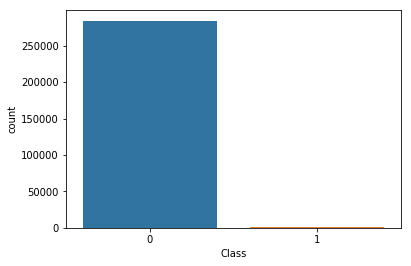

In [7]:
sns.countplot(x='Class',data=dat)

We won't be using "Time" variable

In [0]:
dat = dat.drop([ 'Time'], 1)

In [9]:
dat.dtypes

V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

###Spliting in train and test sets. 
The split is in half, if the test set is smaller, there will be too few fraudulent cases. 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(dat.drop('Class',1) , dat['Class'], test_size=0.5, random_state=0)

Below we verify that the splits has the same distribution in the target variable as the initial set

In [11]:
y_test.value_counts()/y_test.count()

0    0.998294
1    0.001706
Name: Class, dtype: float64

In [12]:
y_train.value_counts()/y_train.count()

0    0.998251
1    0.001749
Name: Class, dtype: float64

##Logistic Regression

In [13]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set: 1.00


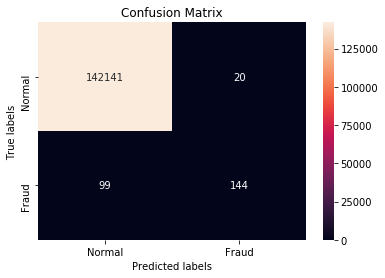

In [14]:
conf_matrix = metrics.confusion_matrix(y_test,y_pred)
#print(conf_matrix)
ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='g')#annot=True to annotate cells, fmt='g' numbers not scientific form
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Normal', 'Fraud']); ax.yaxis.set_ticklabels(['Normal', 'Fraud']);

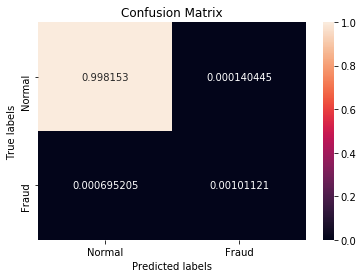

In [15]:
conf_matrix = metrics.confusion_matrix(y_test,y_pred)
conf_matrix=conf_matrix/y_test.size
#print(conf_matrix)
ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='g')#annot=True to annotate cells, fmt='g' numbers not scientific form
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Normal', 'Fraud']); ax.yaxis.set_ticklabels(['Normal', 'Fraud']);

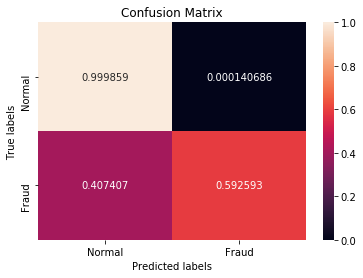

In [16]:
conf_matrix = metrics.confusion_matrix(y_test,y_pred)
conf_matrix=conf_matrix/np.array(y_test.value_counts())[:,None]
#print(conf_matrix)
ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='g')#annot=True to annotate cells, fmt='g' numbers not scientific form
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Normal', 'Fraud']); ax.yaxis.set_ticklabels(['Normal', 'Fraud']);

ROC curve

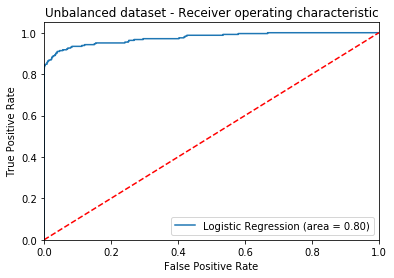

In [17]:
logit_roc_auc = metrics.roc_auc_score(y_test, y_pred)
y_pred_prob=logreg.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Unbalanced dataset - Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

F1-score

In [18]:
metrics.f1_score(y_test, y_pred, average='macro')

0.8535991421670446

###Perfoming Logistic Regresiion after using SMOTE to balance the dataset

In [19]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
os_X_train,os_y_train=os.fit_sample(X_train, y_train)
os_X_train = pd.DataFrame(data=os_X_train,columns=X_train.columns )
os_y_train= pd.DataFrame(data=os_y_train,columns=['Class'])

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [20]:
logreg = LogisticRegression()
logreg.fit(os_X_train, os_y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression classifier on test set: 0.98


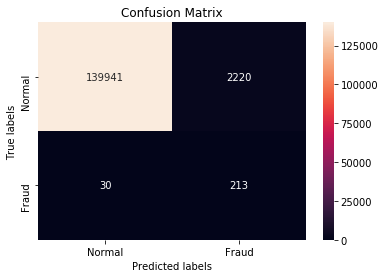

In [21]:
conf_matrix = metrics.confusion_matrix(y_test,y_pred)
#print(conf_matrix)
ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='g')#annot=True to annotate cells, fmt='g' numbers not scientific form
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Normal', 'Fraud']); ax.yaxis.set_ticklabels(['Normal', 'Fraud']);

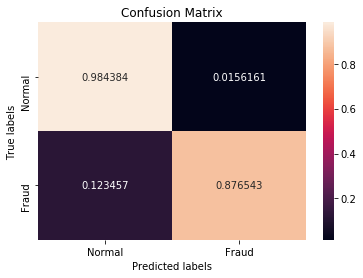

In [22]:
conf_matrix = metrics.confusion_matrix(y_test,y_pred)
conf_matrix=conf_matrix/np.array(y_test.value_counts())[:,None]
#print(conf_matrix)
ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='g')#annot=True to annotate cells, fmt='g' numbers not scientific form
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Normal', 'Fraud']); ax.yaxis.set_ticklabels(['Normal', 'Fraud']);

ROC curve and F1-score

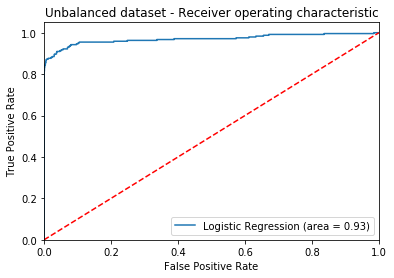

0.575608917341048

In [23]:
logit_roc_auc = metrics.roc_auc_score(y_test, y_pred)
y_pred_prob=logreg.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Unbalanced dataset - Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
metrics.f1_score(y_test, y_pred, average='macro')

Examine the coefficients of Logistic Regresison

In [24]:
print(logreg.coef_)
print(logreg.intercept_)

[[ 1.39694096  2.22031008  0.98007903  0.57870881  1.82634719 -1.080092
  -1.87994187 -0.17882374 -0.16058299 -0.31665091  1.02781618 -1.43357985
  -0.52980971 -1.92535595 -0.18403464 -1.33486164 -1.24412144 -0.82619547
   0.56131904 -1.89645881 -0.6101945   0.49651531  1.88713951 -0.12107848
   0.36975768  0.57443307  0.25005804  2.06596313  0.0220433 ]]
[-6.44117715]


##Decission Tree

In [0]:
from sklearn import tree

In [26]:
# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9991573270413753


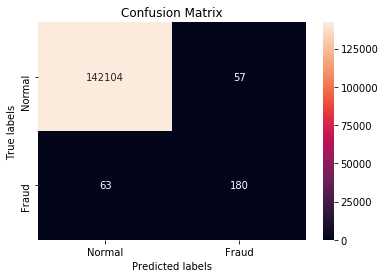

In [27]:
conf_matrix = metrics.confusion_matrix(y_test,y_pred)
#print(conf_matrix)
#print(conf_matrix)
ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='g')#annot=True to annotate cells, fmt='g' numbers not scientific form
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Normal', 'Fraud']); ax.yaxis.set_ticklabels(['Normal', 'Fraud']);

In [0]:
import graphviz 

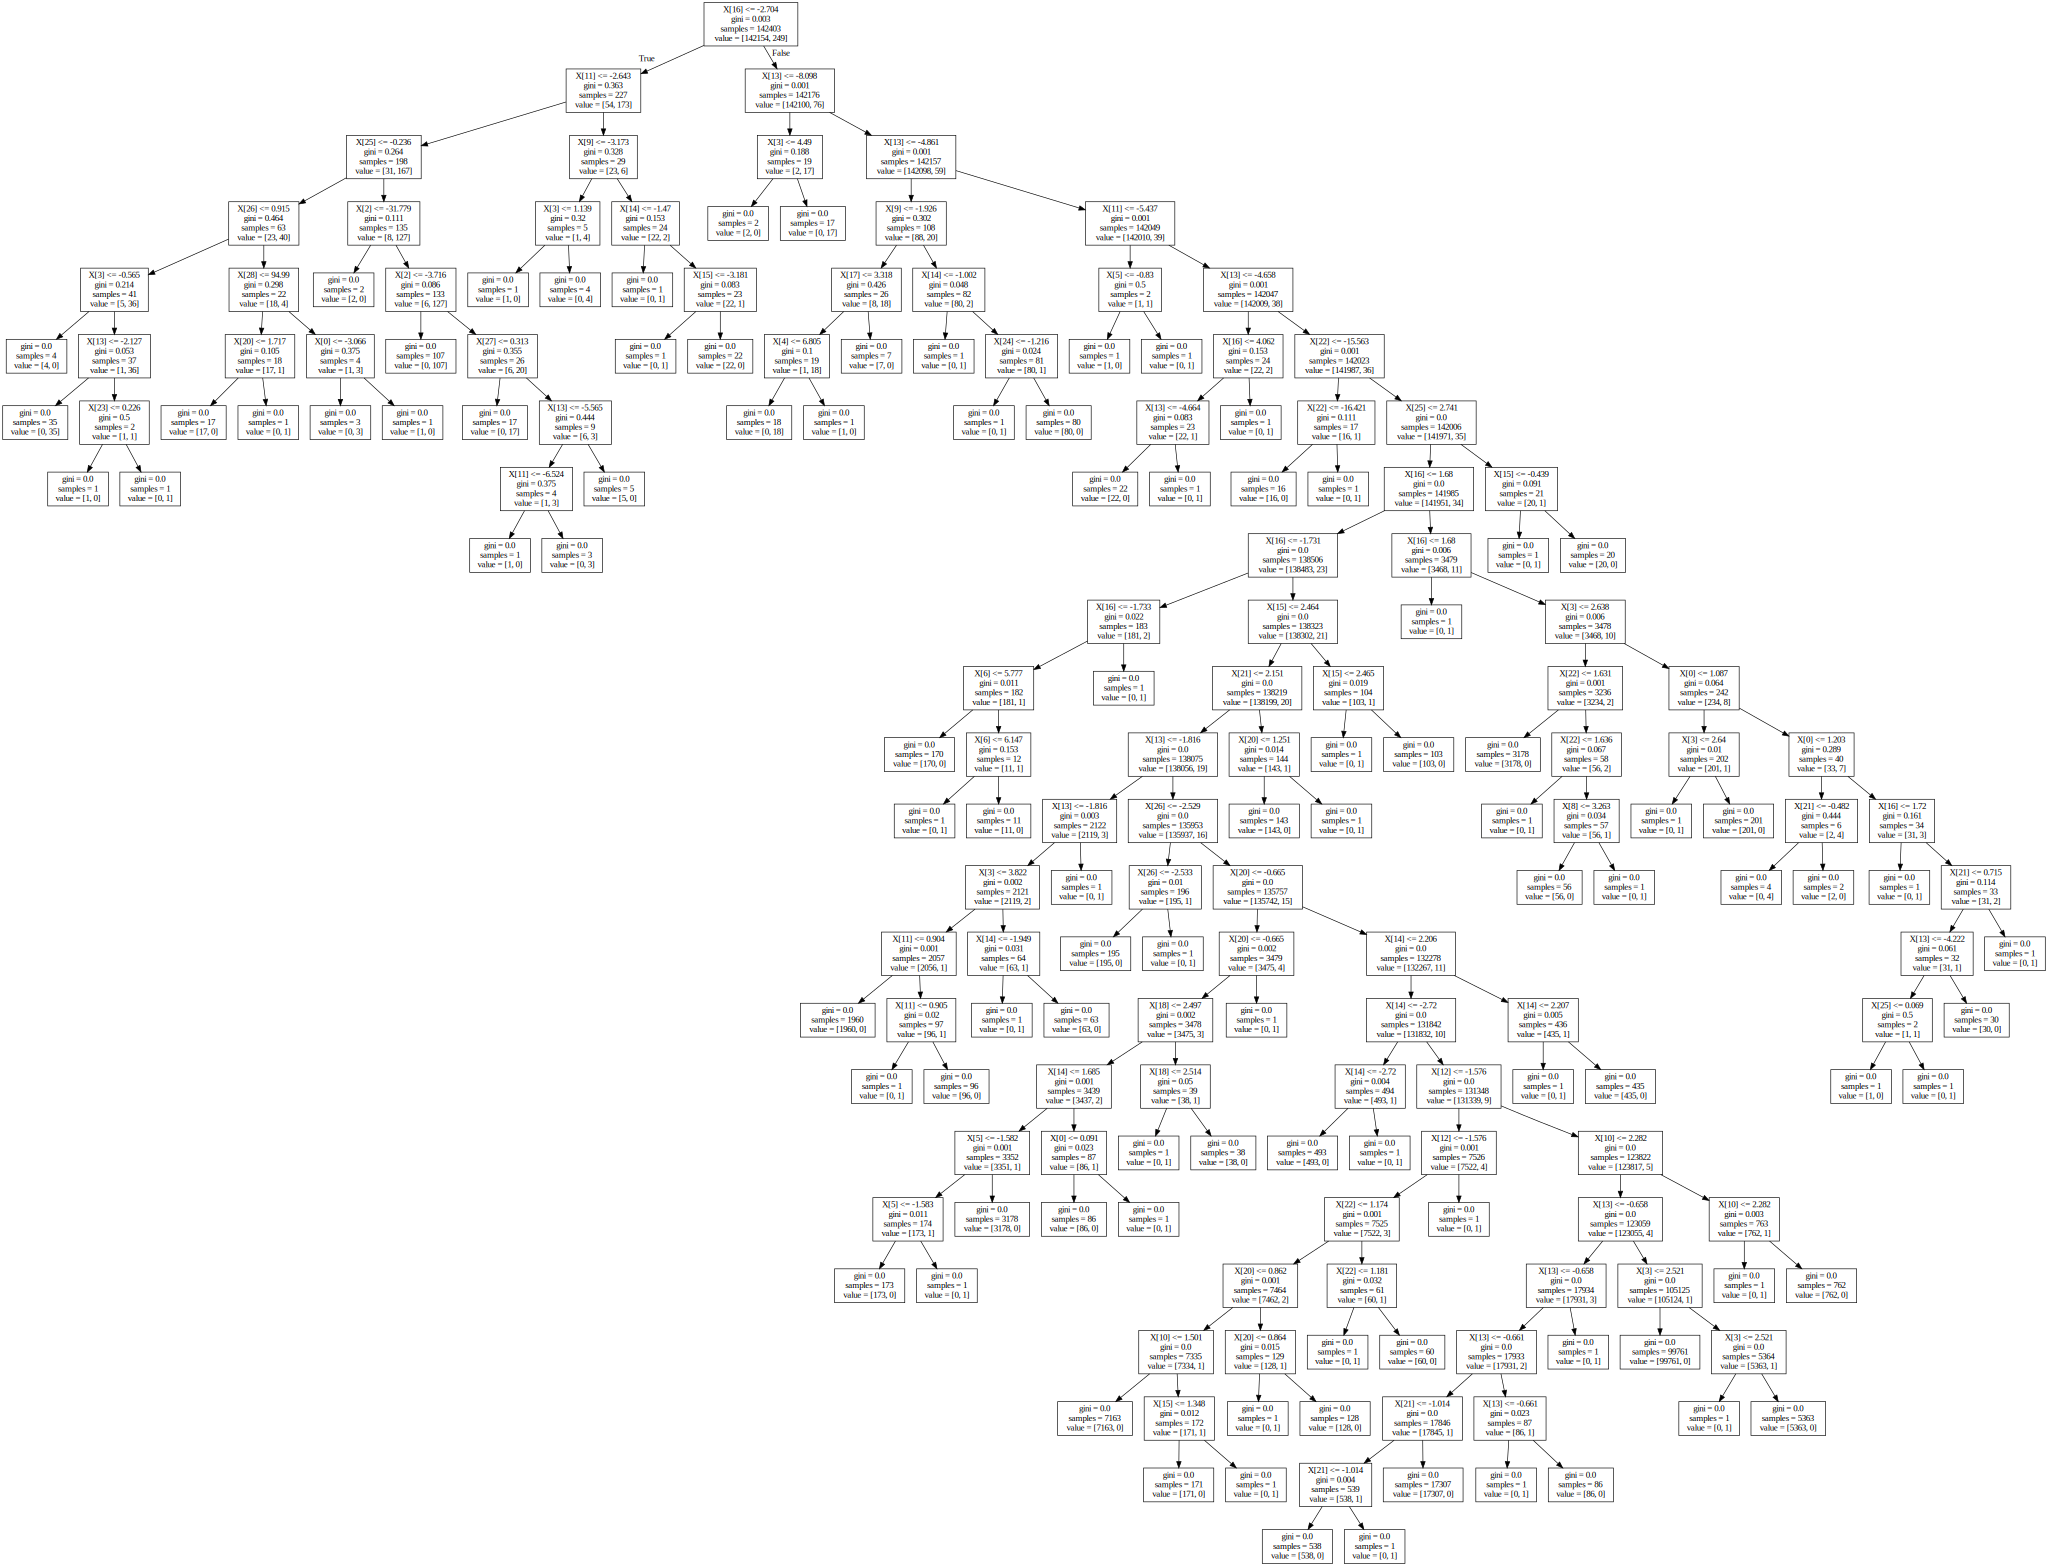

In [29]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph# .render("Credit Fraud") 

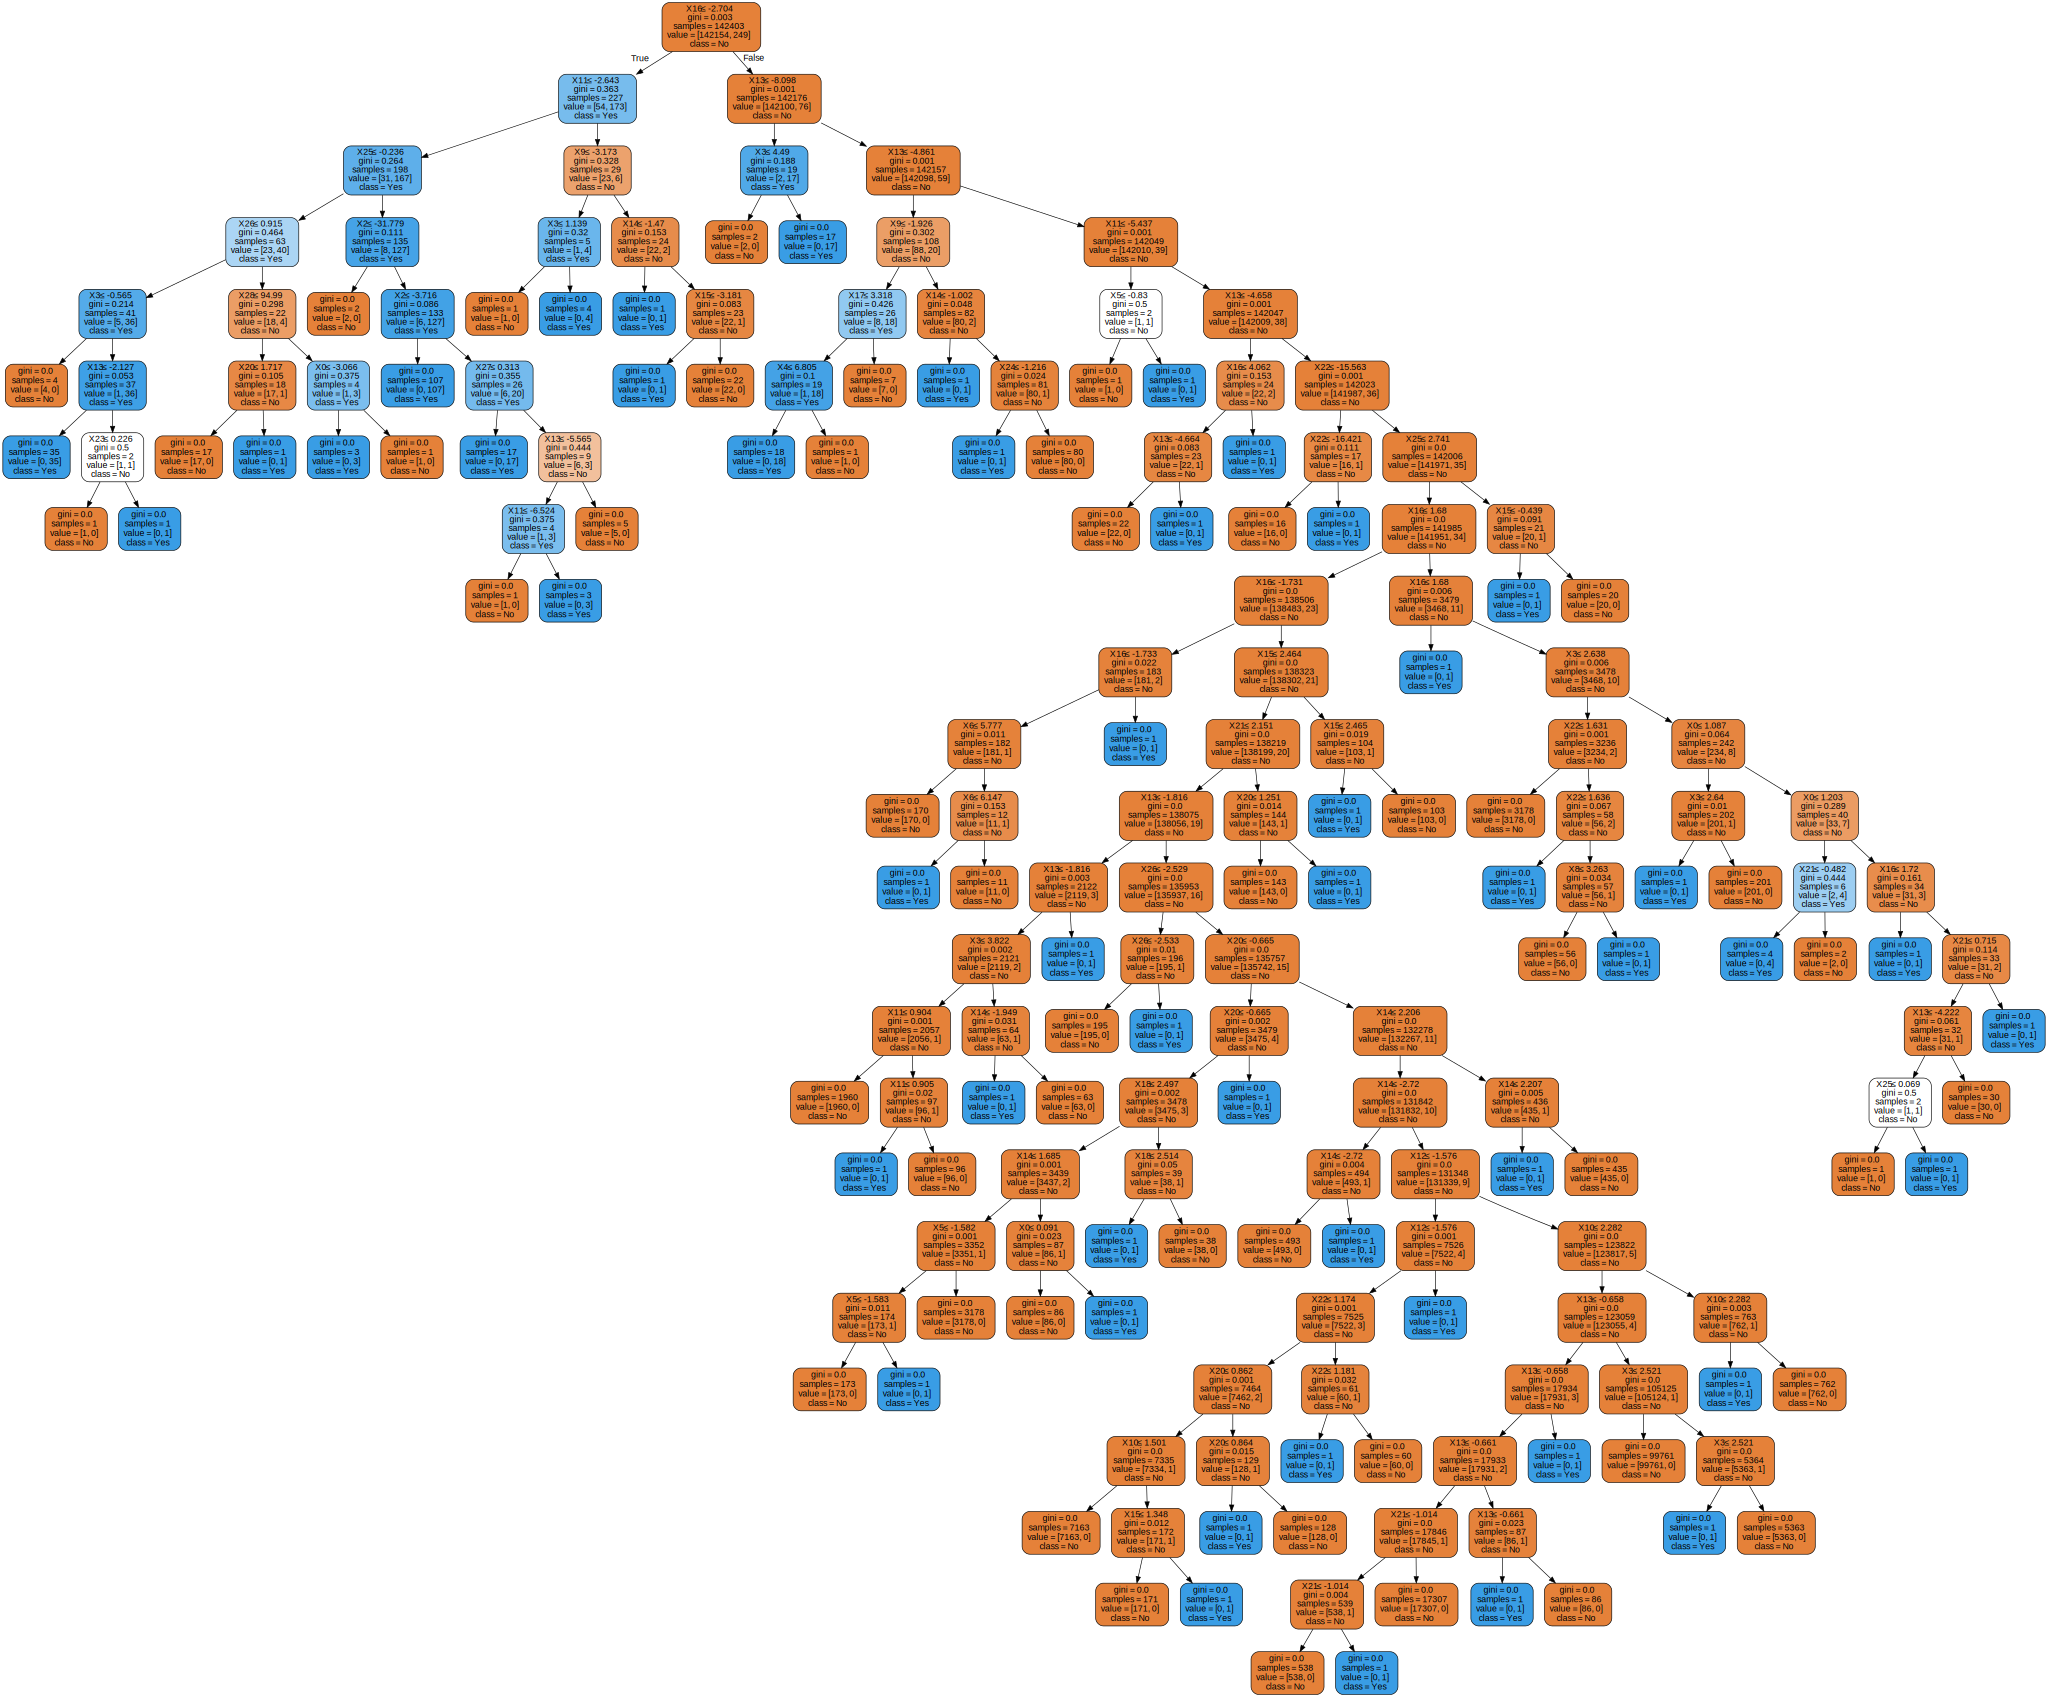

In [30]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                   #feature_names=dat.feature_names,  
                   class_names=['No','Yes'],  
                   filled=True, rounded=True,  
                   special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 



ROC curve and F1-score

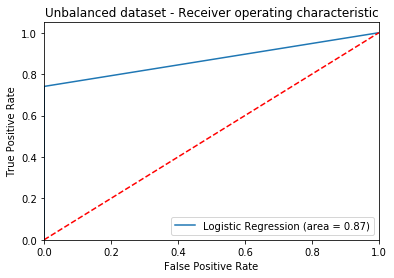

0.8747889761120958

In [31]:
logit_roc_auc = metrics.roc_auc_score(y_test, y_pred)
y_pred_prob=clf.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Unbalanced dataset - Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
metrics.f1_score(y_test, y_pred, average='macro')

###Decission Tree on balanced dataset

Accuracy: 0.9979073621527486


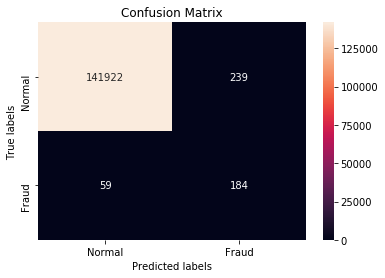

In [32]:
# Train Decision Tree Classifer
clf = clf.fit(os_X_train,os_y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='g')#annot=True to annotate cells, fmt='g' numbers not scientific form
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Normal', 'Fraud']); ax.yaxis.set_ticklabels(['Normal', 'Fraud']);
conf_matrix = metrics.confusion_matrix(y_test, y_pred)


ROC curve and F1-score

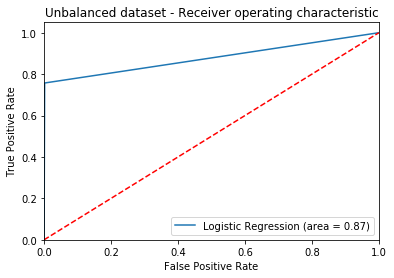

0.7757518905817995

In [33]:
y_pred_prob=clf.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Unbalanced dataset - Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
metrics.f1_score(y_test, y_pred, average='macro')